In [19]:
import json
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

from util.functions import Functions
from wrappers.visualizer import Visualizer

level = 'province'

path_data = './data'
path_img = '{path_data}/imgs/mappe/{level}'.format(path_data=path_data, level=level)
path_csv = '{path_data}/csv'.format(path_data=path_data)
path_geojson = '{path_data}/geojson'.format(path_data=path_data)

csv_in_name = '{path_csv}/covid19-{level}.csv'.format(path_csv=path_csv, level=level)
geojson_province_name = '{path_geojson}/Italy_NUTS_3.json'.format(path_geojson=path_geojson)

In [20]:
# Read geojson NUTS 2 file
with open(geojson_province_name, encoding='utf-8') as geojson_province:
    json_province = json.load(geojson_province)
properties = json_province['features'][0]['properties']
properties

{'prov_name': 'Torino',
 'prov_istat_code_num': 1,
 'prov_acr': 'TO',
 'reg_name': 'Piemonte',
 'reg_istat_code': '01',
 'reg_istat_code_num': 1,
 'prov_istat_code': '001'}

In [21]:
df_p = pd.read_csv(csv_in_name)
last_date = df_p.data[0].split('T')[0]
# df_r.sort_values(by='codice_regione').reset_index(drop=True)
df_p.columns
df_p

,data,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,totale_casi,variazione_totale_casi
0,2020-11-04T17:00:00,1,Piemonte,1,Torino,TO,44465,2251
1,2020-11-04T17:00:00,1,Piemonte,2,Vercelli,VC,2954,85
2,2020-11-04T17:00:00,1,Piemonte,3,Novara,NO,6264,170
3,2020-11-04T17:00:00,1,Piemonte,4,Cuneo,CN,9979,407
4,2020-11-04T17:00:00,1,Piemonte,5,Asti,AT,3932,157
...,...,...,...,...,...,...,...,...
144,2020-11-04T17:00:00,9,Toscana,995,In fase di definizione/aggiornamento,NaN,373,0
145,2020-11-04T17:00:00,4,P.A. Trento,996,In fase di definizione/aggiornamento,NaN,0,0
146,2020-11-04T17:00:00,10,Umbria,997,In fase di definizione/aggiornamento,NaN,0,0
147,2020-11-04T17:00:00,2,Valle d'Aosta,998,In fase di definizione/aggiornamento,NaN,0,0


In [22]:
interactive = False

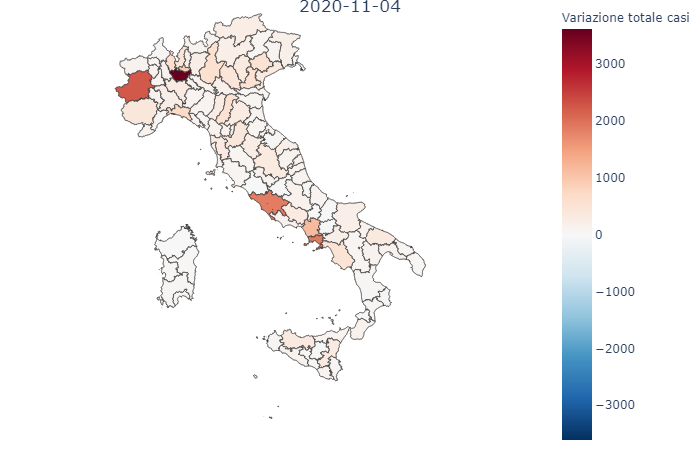

In [23]:
Visualizer.choropleth_go(
    df=df_p,
    geojson=json_province,
    locations='codice_provincia', 
    color='variazione_totale_casi',
    colorscale_color='RdBu',
    reversescale=True,
    featureidkey='properties.prov_istat_code_num',
    zmid=0,
    colorbar_title='Variazione totale casi',
    fig_title=last_date,
    save_info={'path': path_img, 'file_name': 'variazione_totale_casi'},
    interactive=interactive)

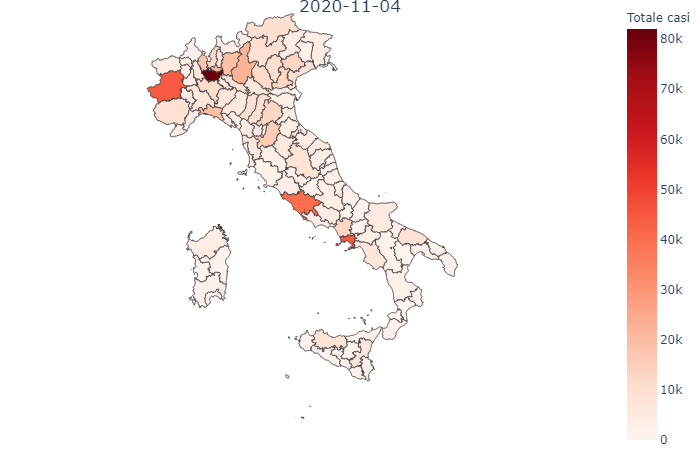

In [24]:
Visualizer.choropleth_go(
    df=df_p,
    geojson=json_province,
    locations='codice_provincia', 
    color='totale_casi',
    featureidkey='properties.prov_istat_code_num',
    colorbar_title='Totale casi',
    fig_title=last_date,
    save_info={'path': path_img, 'file_name': 'totale_casi'},
    interactive=interactive)